In [15]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import numpy as np
import pandas as pd

import utils_3 as utils

## initialize

create the mol with atom numbering for the target

In [16]:
target_smiles = "O=C([C@H]1C)O[C@@]2([H])[C@@]1([H])[C@]3([H])CCC(N3CCC2)=O"
target = Chem.MolFromSmiles(target_smiles)
Chem.Kekulize(target,clearAromaticFlags=True)

In [17]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

In [18]:
amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)

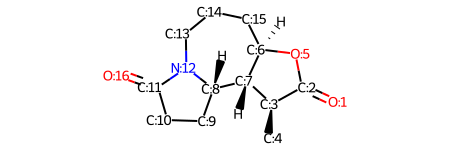

In [19]:
utils.mol_with_atom_index(target)

### Synthia Predicted route

make the change-log from the csv input. 
Meant as an intemediate to generate adjacency matrices for all synthetic intermediates

In [20]:
changelogs = utils.make_changelogs("./edit_files/edits_stemo_synthia_mannich.csv")
changelogs[:3]
# check the changelogs here.

addstereo
ringClose
BrAdd
lactone
lactam
allylation
mannich
addition
end


[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(3, 3, 1), (6, 6, 1), (7, 7, 1), (8, 8, 1)]},
 {'pad': 1, 'pad_elem': [35], 'edits': [(12, 13, -1), (13, 17, 1)]}]

generate matrices

In [21]:
# usually the [1:] is because the first entry is blank.
out_1,final_atoms_1 = utils.apply_changes(amat_init, target_atoms,changelogs[1:])

this is for checking that the mol objects don't break valency rules

In [22]:
for i in range(len(out_1)):
    print(i)
    m = utils.molFromAdjMat(final_atoms_1,out_1[i],sanitize=False)
    Chem.SanitizeMol(m)
    print(Chem.MolToSmiles(m))

0
Br.C.C=CC.C=CCC=O.CN.O.O=CCCC(=O)O
1
Br.C=CC.CC(CO)CC=O.CN.O=CCCC(=O)O
2
Br.C.C=CC.CC(CO)C(C=O)C(N)CCC(=O)O.O
3
Br.C.C=CCC(O)C(C(C)CO)C(N)CCC(=O)O.O
4
Br.C.C=CCC(O)C(C(C)CO)C1CCC(=O)N1.O.O
5
Br.C.C=CCC1OC(=O)C(C)C1C1CCC(=O)N1.O.O
6
C.CC1C(=O)OC(CCCBr)C1C1CCC(=O)N1.O.O
7
Br.C.CC1C(=O)OC2CCCN3C(=O)CCC3C21.O.O
8
Br.C.CC1C(=O)OC2CCCN3C(=O)CCC3C21.O.O


save matrices as npz file

In [23]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/stemo_synthia_mannich",**save_dict)

### Experimental First Generation Route

these subsequent cells are doing the same thing to the other routes

In [24]:
changelogs = utils.make_changelogs("./edit_files/edits_stemo_exp_mannich.csv")
changelogs[:3]

addstereo
methylation
ringclose
deprotBro
addOH
lactam
mannich
end


[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(3, 3, 1), (6, 6, 1), (7, 7, 1), (8, 8, 1)]},
 {'pad': 6,
  'pad_elem': [35, 6, 8, 8, 8, 8],
  'edits': [(3, 4, -1), (3, 3, -1)]}]

In [25]:
out_1,final_atoms_1 = utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [26]:
# this is for checking that the mol objects don't break valency rules
for i in range( len(out_1)):
    print(i)
    m = utils.molFromAdjMat(final_atoms_1,out_1[i],sanitize=True)
    Chem.SanitizeMol(m)
    print(Chem.MolToSmiles(m))

0
Br.C.C=CC.CN.O.O=CCCC(=O)O.O=CCCC(=O)O
1
Br.C.C=CCC1OC(=O)CC1C(CCC(=O)O)NC.O.O.O
2
Br.C.C=CCC1OC(=O)CC1C1CCC(=O)N1C.O.O.O.O
3
Br.C.CN1C(=O)CCC1C1CC(=O)OC1CCCO.O.O.O
4
C.C.O.O.O.O.O=C1CCC(C2CC(=O)OC2CCCBr)N1
5
Br.C.C.O.O.O.O.O=C1CC2C(CCCN3C(=O)CCC23)O1
6
Br.C.CC1C(=O)OC2CCCN3C(=O)CCC3C21.O.O.O.O
7
Br.C.CC1C(=O)OC2CCCN3C(=O)CCC3C21.O.O.O.O


In [27]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/stemo_exp_mannich",**save_dict)

### Experimental Second Generation Route

In [28]:
changelogs = utils.make_changelogs("./edit_files/edits_stemo_exp_cyclobutanone.csv")
changelogs[:3]

addstereo
azidation
addition
schmidt
end


[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(3, 3, 1), (6, 6, 1), (7, 7, 1), (8, 8, 1)]},
 {'pad': 2,
  'pad_elem': [7, 8],
  'edits': [(11, 12, -1), (8, 12, -1), (11, 8, 1), (13, 12, -1), (13, 14, 1)]}]

In [29]:
# check the changelogs here. usually the [1:] is because the first entry is blank.
out_1,final_atoms_1 = utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [30]:
# this is for checking that the mol objects don't break valency rules
for i in range( len(out_1)):
    print(i)
    m = utils.molFromAdjMat(final_atoms_1,out_1[i],sanitize=True)
    Chem.SanitizeMol(m)
    print(Chem.MolToSmiles(m))

0
C.C=CC.N.N=C1CCC1.O.O=C1C=CC(O)O1
1
C.C=CCC1C=CC(=O)O1.N.N=C1CCC1.O.O
2
C=CCC1OC(=O)C(C)C1C1CCC1=O.N.N.O
3
CC1C(=O)OC2CCCN3C(=O)CCC3C21.N.O
4
CC1C(=O)OC2CCCN3C(=O)CCC3C21.N.O


In [31]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/stemo_exp_schmidt",**save_dict)